## 2. Vizualizace dat
V jednom ze cvičení jste probírali práci s moduly pro vizualizaci dat. Mezi nejznámější moduly patří matplotlib (a jeho nadstavby jako seaborn), pillow, opencv, aj. Vyberte si nějakou zajímavou datovou sadu na webovém portále Kaggle a proveďte datovou analýzu datové sady. Využijte k tomu různé typy grafů a interpretujte je (minimálně alespoň 5 zajímavých grafů)​. Příklad interpretace: z datové sady pro počasí vyplynulo z liniového grafu, že v létě je vyšší rozptyl mezi minimální a maximální hodnotou teploty. Z jiného grafu vyplývá, že v létě je vyšší průměrná vlhkost vzduchu. Důvodem vyššího rozptylu může být absorpce záření vzduchem, který má v létě vyšší tepelnou kapacitu.

In [2]:
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# STAŽENÍ DATASETU LETECKÝCH NEHOD
od.download("https://www.kaggle.com/datasets/ramjasmaurya/aviation-accidents-history1919-april-2022")

Skipping, found downloaded files in "./aviation-accidents-history1919-april-2022" (use force=True to force download)


In [27]:
data= pd.read_csv("aviation-accidents-history1919-april-2022/aircraft_accidents in oceans_unknown - aircraft_accidents.csv")
data

,Ocean/Country,date,Air-craft type,registration name/mark,operator,fatilites,location,category
0,Unknown country,19-Dec-1943,PB2B-1 Canso A (PBY-5A),9786,RCAF,NaN,unknown,A1
1,Unknown country,24-Mar-1945,Curtiss C-46D,44-77582,USAAF,NaN,NaN,A1
2,Unknown country,29-Jan-1945,Curtiss C-46D,42-101039,USAAF,NaN,NaN,A1
3,Unknown country,24-Mar-1945,Curtiss C-46D,44-77645,USAAF,NaN,NaN,A1
4,Unknown country,??-???-1942,Junkers Ju-52/3mg4e,D-AXFH,German AF,NaN,NaN,A1
...,...,...,...,...,...,...,...,...
1382,Unknown country,11-Apr-1945,Douglas C-47A (DC-3),42-92775,USAAF,NaN,unknown,C1
1383,Pacific Ocean,30-Sep-1974,Grumman G-73 Mallard,N2965,U.S. Dept of Interior,4,near Alaska,A1
1384,Unknown country,16-Sep-1971,Sud-Aviation SE-210 Caravelle,NaN,Alia,0,NaN,H2
1385,Pacific Ocean,26-Nov-1942,Consolidated PBY-5A Catalina,2951,US Navy,9,"near Oahu Island,...",A1


In [28]:
cats = {
    'A' : 'Accident',
    'I' : 'Incident',
    'H' : 'Hijacking',
    'C' : 'Criminal occurrence (sabotage, shoot down)',
    'O': 'other occurrence (ground fire, sabotage)',
    'U': 'type of occurrence unknown',
}
damages = {
    '1' : 'hull-loss',
    '2' : 'repairable damage'
}
def month_to_num(shortMonth):
    return {
            'jan': 1,
            'feb': 2,
            'mar': 3,
            'apr': 4,
            'may': 5,
            'jun': 6,
            'jul': 7,
            'aug': 8,
            'sep': 9, 
            'oct': 10,
            'nov': 11,
            'dec': 12
    }[shortMonth]

In [29]:
cat_list = []
damage_list = []
years = []
months = []
days = []
for row in range(data["date"].size):
    category = data['category'][row]
    date_str = data["date"][row]
    if date_str == "date ukn.":
        day = month = year = None
    else:
        try:
            day, month, year = date_str.split("-")
            day = int(day) if "?" not in day else None
            month = month_to_num(month.lower()) if "?" not in month else None
            year = int(year) if "?" not in year else None
                
        except:
            day = month = year = None
    days.append(day)
    months.append(month)
    years.append(year)
        
    cat_list.append(cats.get(category[0], None))
    damage_list.append(damages.get(category[1], None))

In [30]:
data = data.assign(cat=cat_list)
data = data.assign(damage=damage_list)
data = data.assign(day=days)
data = data.assign(month=months)
data = data.assign(year=years)

### Připravený dataset

In [31]:
data

,Ocean/Country,date,Air-craft type,registration name/mark,operator,fatilites,location,category,cat,damage,day,month,year
0,Unknown country,19-Dec-1943,PB2B-1 Canso A (PBY-5A),9786,RCAF,NaN,unknown,A1,Accident,hull-loss,19.0,12.0,1943.0
1,Unknown country,24-Mar-1945,Curtiss C-46D,44-77582,USAAF,NaN,NaN,A1,Accident,hull-loss,24.0,3.0,1945.0
2,Unknown country,29-Jan-1945,Curtiss C-46D,42-101039,USAAF,NaN,NaN,A1,Accident,hull-loss,29.0,1.0,1945.0
3,Unknown country,24-Mar-1945,Curtiss C-46D,44-77645,USAAF,NaN,NaN,A1,Accident,hull-loss,24.0,3.0,1945.0
4,Unknown country,??-???-1942,Junkers Ju-52/3mg4e,D-AXFH,German AF,NaN,NaN,A1,Accident,hull-loss,NaN,NaN,1942.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,Unknown country,11-Apr-1945,Douglas C-47A (DC-3),42-92775,USAAF,NaN,unknown,C1,"Criminal occurrence (sabotage, shoot down)",hull-loss,11.0,4.0,1945.0
1383,Pacific Ocean,30-Sep-1974,Grumman G-73 Mallard,N2965,U.S. Dept of Interior,4,near Alaska,A1,Accident,hull-loss,30.0,9.0,1974.0
1384,Unknown country,16-Sep-1971,Sud-Aviation SE-210 Caravelle,NaN,Alia,0,NaN,H2,Hijacking,repairable damage,16.0,9.0,1971.0
1385,Pacific Ocean,26-Nov-1942,Consolidated PBY-5A Catalina,2951,US Navy,9,"near Oahu Island,...",A1,Accident,hull-loss,26.0,11.0,1942.0


[]

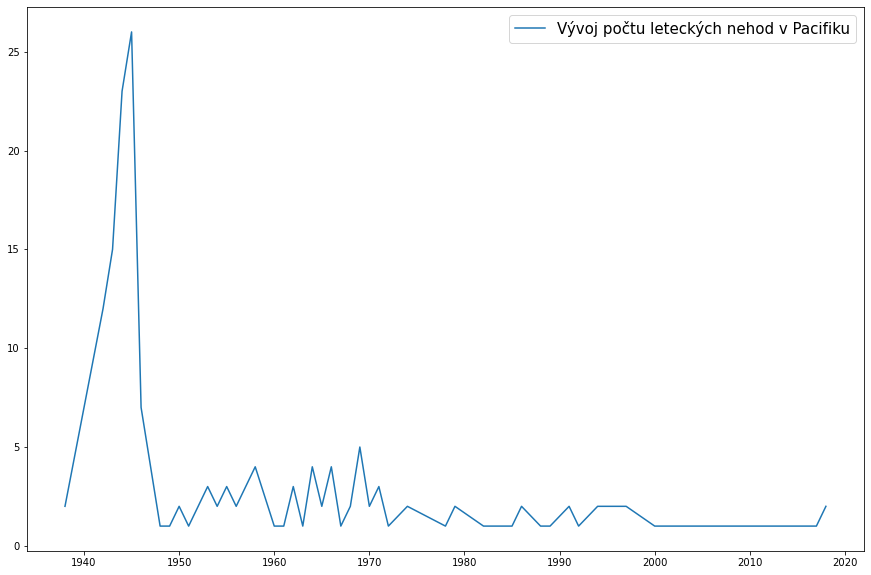

In [32]:
# pouze nehody v Pacifiku
pacific = data[data["Ocean/Country"] == "Pacific Ocean"]
pacific_counts = pacific.groupby("year").count()["cat"]

fig = plt.figure(figsize=(15,10))
plt.plot(pacific_counts.keys(), pacific_counts, label="Vývoj počtu leteckých nehod v Pacifiku")

plt.legend(fontsize=15)
plt.plot()

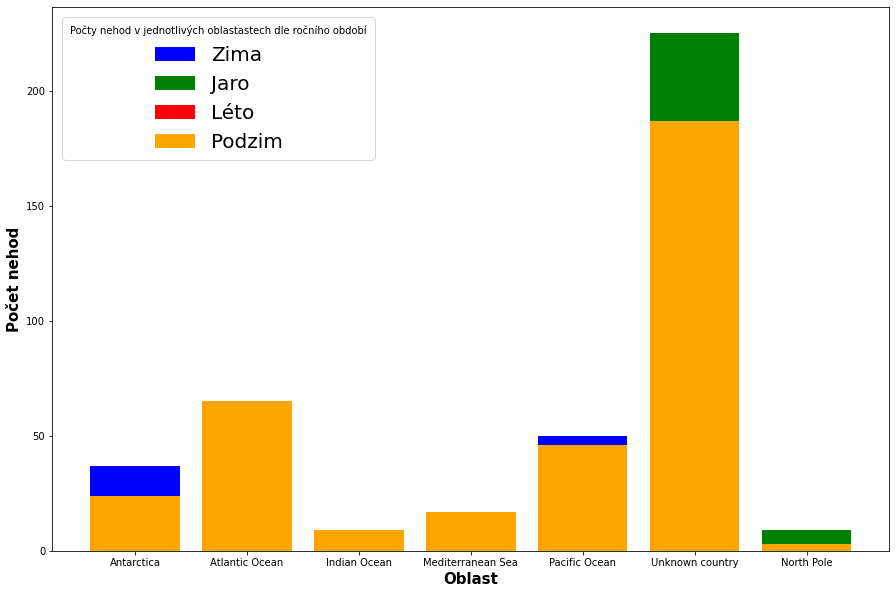

In [33]:
# pouze nehody v zime
winter = data[(data["month"] < 3) | (data["month"] > 11)]
winter = winter.groupby("Ocean/Country").count()["year"]

# pouze nehody na jare
spring = data[(data["month"] >= 3) & (data["month"] < 6)]
spring = spring.groupby("Ocean/Country").count()["year"]

#pouze nehody v lete
summer = data[(data["month"] >= 6) & (data["month"] < 9)]
summer = summer.groupby("Ocean/Country").count()["year"]

#pouze nehody na podzim
autumn = data[(data["month"] >= 9) & (data["month"] <= 11)]
autumn = autumn.groupby("Ocean/Country").count()["year"]

# graf
fig = plt.figure(figsize=(15,10))

plt.bar(winter.keys(), winter.values, color='b', label="Zima")
plt.bar(spring.keys(), spring.values, color='g', label="Jaro")
plt.bar(summer.keys(), summer.values, color='red', label="Léto")
plt.bar(autumn.keys(), autumn.values, color='orange', label="Podzim")

plt.xlabel('Oblast', fontweight ='bold', fontsize = 15)
plt.ylabel('Počet nehod', fontweight ='bold', fontsize = 15)
 
plt.legend(title="Počty nehod v jednotlivých oblastastech dle ročního období", fontsize=20)
plt.show()

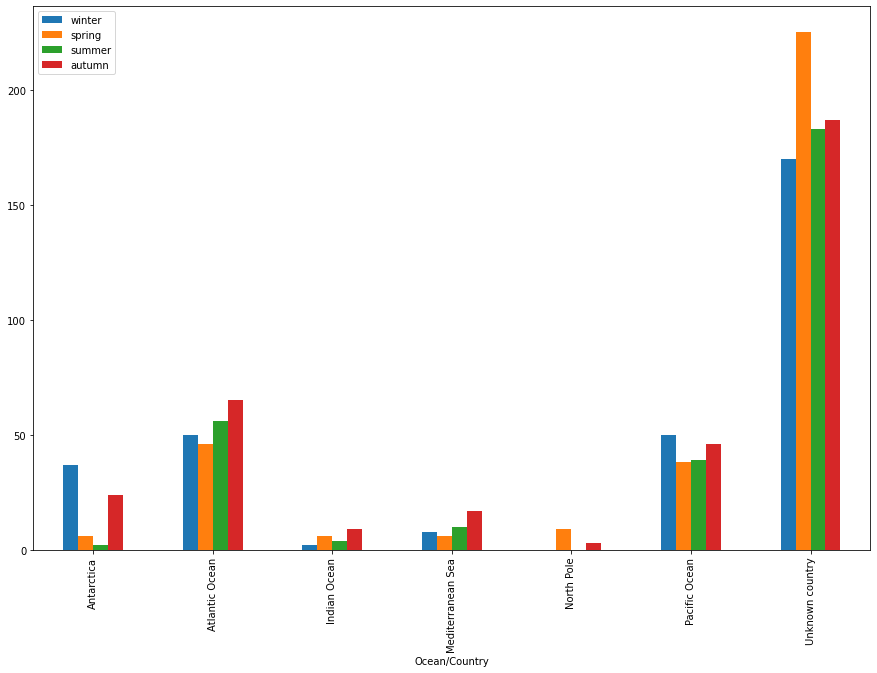

In [26]:
# prehlednejsi graf
df_data = {
    "winter": winter,
    "spring": spring,
    "summer": summer,
    "autumn": autumn
}
df = pd.DataFrame(df_data, columns=["winter", "spring", "summer", "autumn"])
df.plot.bar(figsize=(15, 10))
plt.show()

In [40]:
winter_data = data[(data["month"] < 3) | (data["month"] > 11)]
winter_antarctica = winter_data[data["Ocean/Country"] == "Antarctica"].groupby("year").count()["cat"]
winter_antarctica

/tmp/ipykernel_93997/3121941979.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  winter_antarctica = winter_data[data["Ocean/Country"] == "Antarctica"].groupby("year").count()["cat"]


year
1946.0    1
1955.0    1
1956.0    2
1958.0    3
1959.0    2
1960.0    2
1962.0    1
1964.0    1
1965.0    2
1966.0    1
1968.0    2
1969.0    1
1970.0    1
1971.0    2
1973.0    1
1977.0    1
1979.0    1
1986.0    1
1987.0    1
1989.0    1
1992.0    1
1999.0    1
2005.0    1
2006.0    1
2007.0    1
2009.0    1
2012.0    1
2013.0    1
2016.0    1
Name: cat, dtype: int64

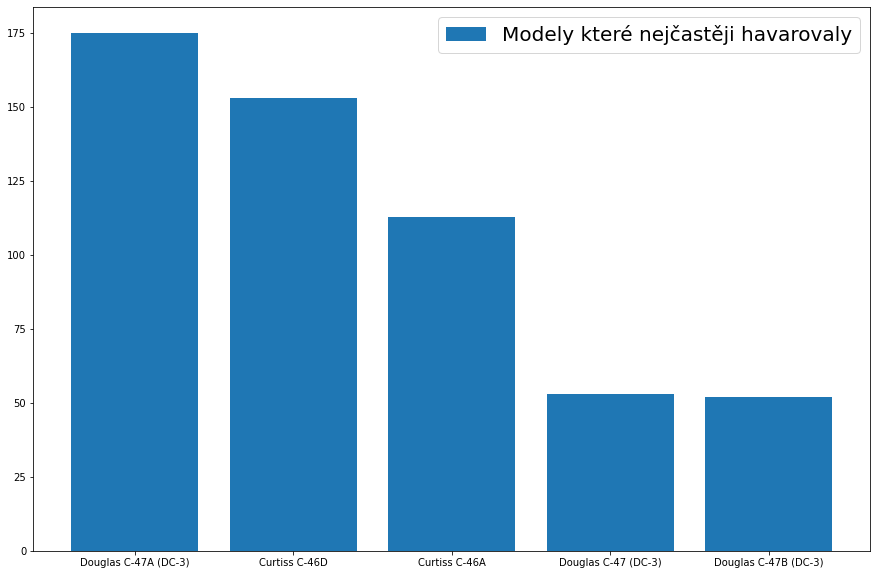

In [78]:
a = data.groupby("Air-craft type").count()["year"]
a = a.sort_values(ascending=False)[:5]
x = a.keys()
y = a.values

fig = plt.figure(figsize=(15,10))
plt.bar(x, y, label="Modely které nejčastěji havarovaly")
plt.legend(fontsize=20)
plt.show()

In [127]:
data.groupby("location").count()["year"].sort_values(ascending=False)

location
unknown                 210
Unknown                  40
South Pacific            13
Atlantic Ocean           11
Gulf of Mexico            7
                       ... 
near Australia            1
near Ashizuri Cap...      1
near Ascension Is...      1
within Indian Ocean       1
Ice Station ...           0
Name: year, Length: 418, dtype: int64

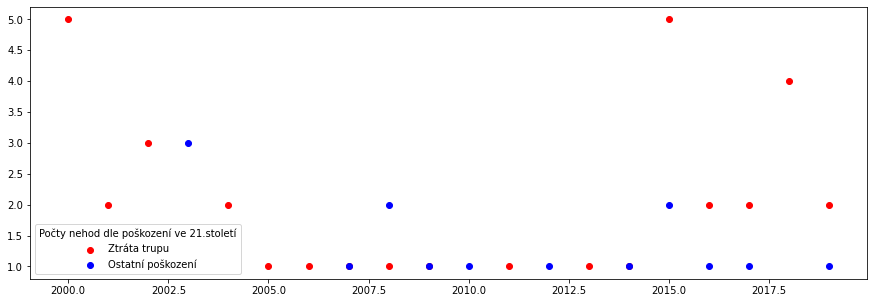

In [198]:
data_21century = data[data["year"] >= 2000]
hull_loss = data_21century[data_21century["damage"] == "hull-loss"].groupby("year").count()["cat"]
other = data_21century[data_21century["damage"] != "hull-loss"].groupby("year").count()["cat"]

fig = plt.figure(figsize=(15,5))
plt.scatter(hull_loss.keys(), hull_loss.values, color="red", label="Ztráta trupu")
plt.scatter(other.keys(), other.values, color="blue", label="Ostatní poškození")

plt.legend(title="Počty nehod dle poškození ve 21.století")
plt.show()

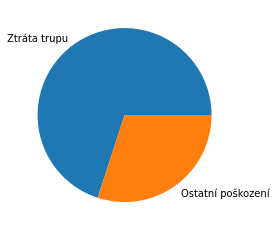

In [209]:
plt.pie([sum(hull_loss.values), sum(other.values)], labels=["Ztráta trupu", "Ostatní poškození"])
plt.show()

In [193]:
data[data["operator"]=="USAAF"].groupby("Air-craft type").count().sort_values(ascending=False, by="cat")[:3]

,Ocean/Country,date,registration name/mark,operator,fatilites,location,category,cat,damage,day,month,year
Air-craft type,,,,,,,,,,,,
Curtiss C-46D,149,149,149,149,3,6,149,149,149,147,149,149
Douglas C-47A (DC-3),130,130,130,130,16,125,130,130,130,127,127,129
Curtiss C-46A,109,109,109,109,21,16,109,109,109,107,109,109


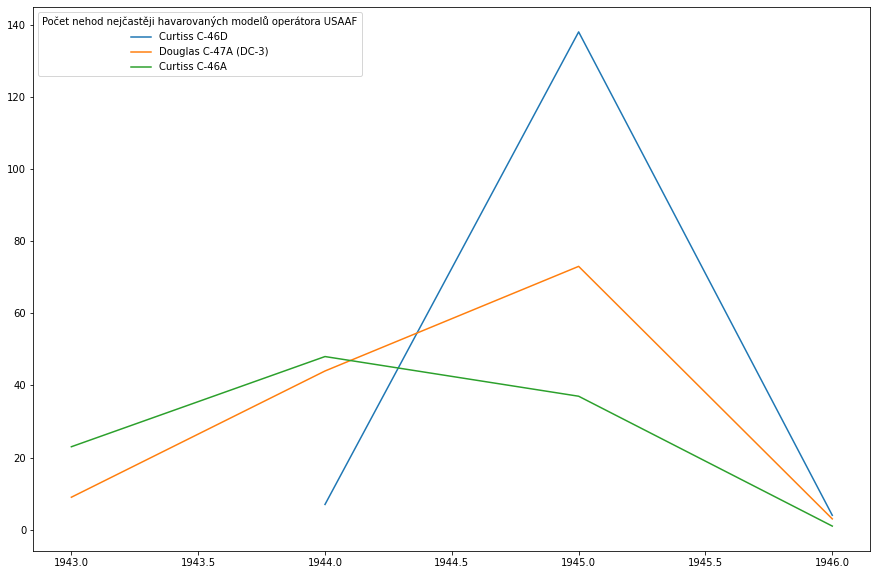

In [205]:
m1 = data[(data["operator"]=="USAAF") & (data["Air-craft type"] == "Curtiss C-46D")].groupby("year").count()["cat"]
m2 = data[(data["operator"]=="USAAF") & (data["Air-craft type"] == "Douglas C-47A (DC-3)")].groupby("year").count()["cat"]
m3 = data[(data["operator"]=="USAAF") & (data["Air-craft type"] == "Curtiss C-46A")].groupby("year").count()["cat"]

fig = plt.figure(figsize=(15,10))
plt.plot(m1.keys(), m1.values, label="Curtiss C-46D")
plt.plot(m2.keys(), m2.values, label="Douglas C-47A (DC-3)")
plt.plot(m3.keys(), m3.values, label="Curtiss C-46A")

plt.legend(title="Počet nehod nejčastěji havarovaných modelů operátora USAAF")
plt.show()